Secant Method
-------------

When you need to determine $M$, use this equation:

$$f(M)=\frac{\left\lbrace \left[ \frac{2 + 0.4M^2}{2.4}\right]^{3.5} -1  \right\rbrace}{0.7M^2C_{pi}}-\left\lbrace \sqrt{1 - M^2} + \frac{\left(\frac{M^2C_{pi}}{2}\right)}{1 + \sqrt{1 - M^2}} \right\rbrace^{-1} $$

We going to suppose $C_{pi}=-0.383$ and that search the $M$ value, which is expected to stay between $0.5$  and $0.9$. The function $f(M)$ behavior is important, for $C_{pi}=-0.383$, the function decreases since $+\infty$ until $-\infty$ when $M$ grows since $0$ until $0.987$; then it is necessary to impose some restrictions about values of shortening beginning,  so the graphic is important. 
- Get the critical number of Match from secant Method 
- Stop the iterations when the relative error is 0.0003%
- Explain the chosen initial value 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

We declare our function 

In [2]:
functionOne = lambda m: (np.power(((2 + 0.4*m**2) / 2.4), 3.5) - 1)\
                        / (0.7 * m**2 * -0.383)\
                        - 1 / ( np.sqrt(1-m**2)
                        + ((m**2 * -0.383) / 2)\
                        / (1 + np.sqrt(1-m**2)) )

We graph our function in an interest range $(0.5,0.9)$ to see the initial values:

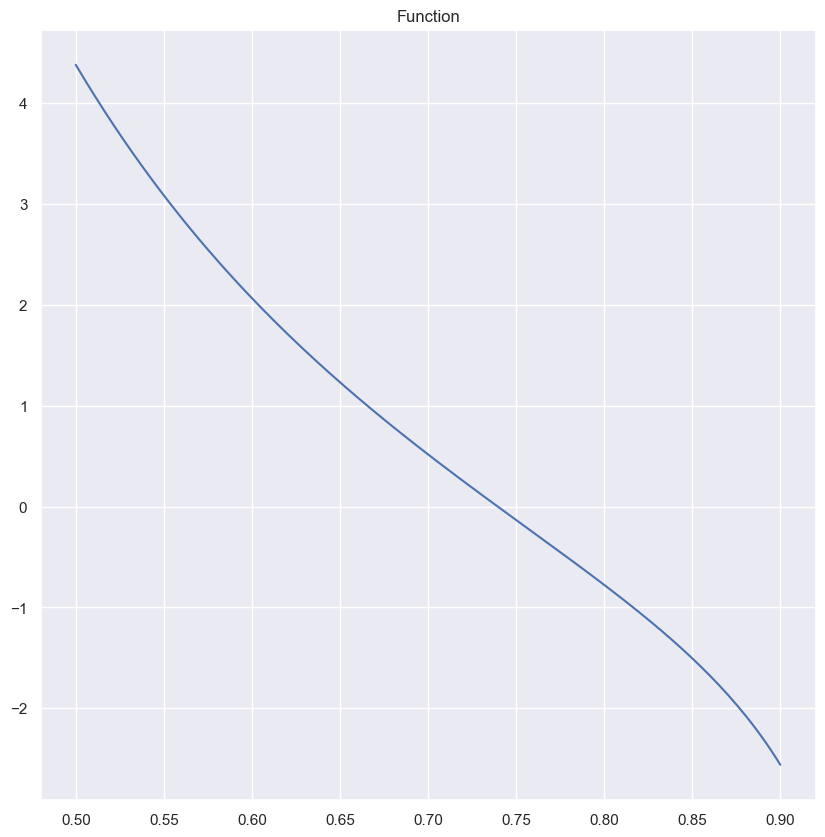

In [6]:
X = np.linspace(0.5, 0.9, num=150)
fig=plt.figure(figsize=(10,10))
sns.lineplot(x=X, y=functionOne(X))
plt.title(r"Function")
plt.show()

We can see in the graph, we must choose the value $x_0 = 0.5$ and $x_1 = 0.7$, so when we apply the secant method, the root is near to interest range.

In [7]:
x0 = [0.6]
x1 = [0.7]
x2 = [ x1[0] - (functionOne(x1[0])) * (x0[0] - x1[0]) / (functionOne(x0[0]) - functionOne(x1[0])) ]
error_a = [np.nan]
error_r = [np.nan]
error_rp = [1]
i = 0

while error_rp[i]>0.0003:
  x0.append(x1[i])
  x1.append(x2[i])
  i += 1
  x2.append(x1[i] - (functionOne(x1[i])) * (x0[i] - x1[i]) /
            (functionOne(x0[i]) - functionOne(x1[i])))
  error_a.append(abs(x2[i]-x2[i-1]))
  error_r.append(error_a[i]/abs(x2[i]))
  error_rp.append(error_r[i]*100)
error_rp[0] = np.nan

tabla = pd.DataFrame(data = {
                      'Iteración': np.arange(1, len(x2) + 1),
                      'xk-1': x0,
                      'xk': x1,
                      'f(xk-1)': [functionOne(x) for x in x0],
                      'f(xk)': [functionOne(x) for x in x1],
                      'xk+1': x2,
                      'f(xk+1)': [functionOne(x) for x in x2],
                      'Error absoluto': error_a,
                      'Error relativo': error_r,
                      'Error relativo [%]': error_rp,
                      })
tabla.set_index('Iteración', inplace=True)
tabla

,xk-1,xk,f(xk-1),f(xk),xk+1,f(xk+1),Error absoluto,Error relativo,Error relativo [%]
Iteración,,,,,,,,,
1,0.600000,0.700000,2.066634,0.517587,0.733413,7.922404e-02,NaN,NaN,NaN
2,0.700000,0.733413,0.517587,0.079224,0.739452,1.869937e-03,6.038678e-03,8.166424e-03,0.816642
3,0.733413,0.739452,0.079224,0.001870,0.739598,4.419575e-06,1.459774e-04,1.973740e-04,0.019737
4,0.739452,0.739598,0.001870,0.000004,0.739598,2.231939e-10,3.458332e-07,4.675960e-07,0.000047


The table shows that after four iterations, reached tolerance and finished with a relative error of $1e-4%$ returning the 0.839598 value.  Below we can look at the graph from relative error and absolute error:

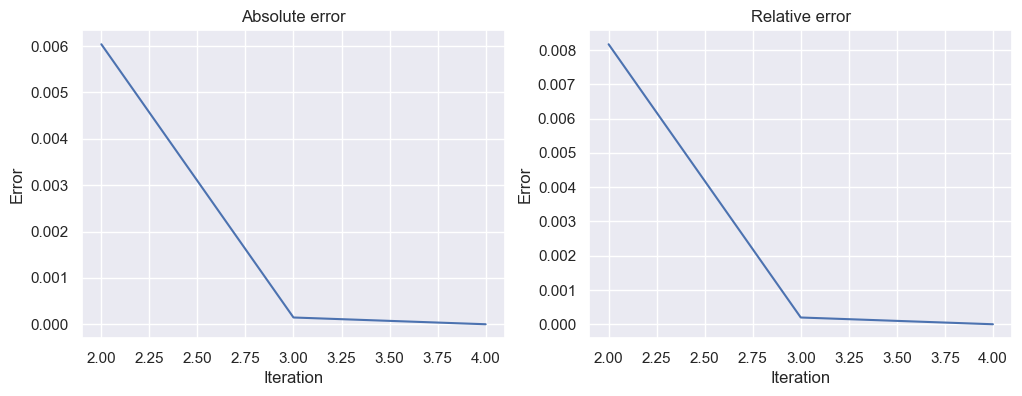

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(tabla.index,tabla['Error absoluto'][0:])
plt.title("Absolute error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.subplot(122)
plt.plot(tabla.index,tabla['Error relativo'][0:])
plt.title("Relative error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()